In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [96]:
d_tr=pd.read_csv('/kaggle/input/titanic/train.csv')
d_te=pd.read_csv('/kaggle/input/titanic/test.csv')
d_gender=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')


In [138]:
print(d_tr.shape)
print(d_te.shape)

(889, 12)
(418, 11)


# Data analysis

In [139]:
d_tr.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
d_tr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
d_tr.dropna(subset=['Embarked'], inplace=True)
d_tr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [70]:
z=d_tr.loc[d_tr.SibSp]['Survived']

z.value_counts()

Survived
0    629
1    260
Name: count, dtype: int64

In [71]:
d_tr.Embarked.value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [105]:
v=d_tr.loc[d_tr.Parch]['Survived']

v.value_counts()

Survived
0    686
1    203
Name: count, dtype: int64

In [132]:
d_tr.Survived.value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

# Percentage of those who lived

In [107]:
women=d_tr.loc[d_tr.Sex=='female']['Survived']
sm=sum(women)
ln=len(women)
women_rate=sm/ln
women_rate
#who live


0.7403846153846154

In [108]:
men=d_tr.loc[d_tr.Sex=='male']['Survived']
man_rate=sum(men)/len(men)
man_rate


0.18890814558058924

In [128]:
features = ["Pclass", "Sex", "SibSp", "Parch","Embarked"]
X = pd.get_dummies(d_tr[features])
X_testt = pd.get_dummies(d_te[features])
Y=d_tr['Survived']



# Train model

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
svm_classifier = SVC(kernel='linear',C=1.0)
svm_classifier.fit(X, Y)
Y_pred = svm_classifier.predict(X_test)


accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)






Accuracy: 0.8314606741573034


In [134]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[93 12]
 [18 55]]


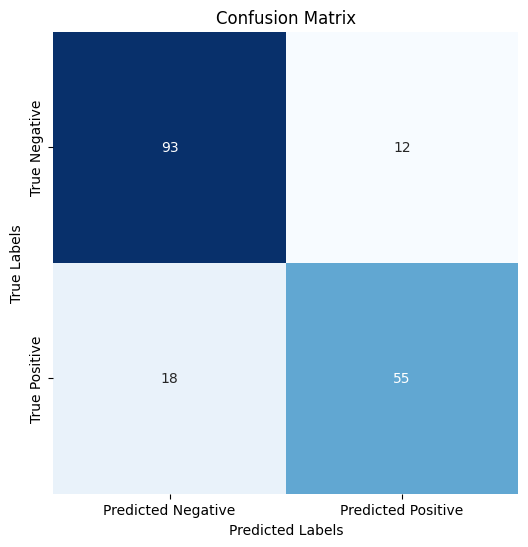

In [137]:
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()